## Clean and plot underway data from AR28

This cruise involved an emergency return to port, so underway data has to be subset to remove this part of the timeseries

In [7]:
import os
from glob import glob

# your paths may vary
UNDERWAY_DIR = r'D:\nes-lter-ims-test-data\ar28_underway_proc'
assert os.path.exists(UNDERWAY_DIR)

In [8]:
# parse and convert to Pandas

import pandas as pd
import re

SALINITY = 'SBE45S'
TEMPERATURE = 'SBE48T'

dfs = []
for csv in glob(os.path.join(UNDERWAY_DIR, '*.csv')):
    bn = os.path.basename(csv)
    if not re.match(r'AR\d{6}_\d{4}.csv', bn):
        continue
    df = pd.read_csv(csv, skiprows=1)
    dfs.append(df)
    
df = pd.concat(dfs)
df.head()

,DATE_GMT,TIME_GMT,Dec_LAT,Dec_LON,SPD,HDT,COG,SOG,WXTP_Ta,WXTS_Ta,...,RAD_LW,PAR,SBE45S,SBE48T,FLR,FLOW,SSVdslog,Depth12,Depth35,EM122
0,2018/04/02,17:12:23.942,41.524,-70.672,NODATA,24.62,339.4,0.02,1.1,0.8,...,336.75,846.49,0.2195,4.8371,60.8,0.0,1425.805,NODATA,NODATA,NODATA
1,2018/04/02,17:13:23.942,41.524,-70.672,NAN,24.88,304.7,0.03,1.1,0.8,...,337.69,807.59,0.2195,4.8343,60.7,0.0,1425.792,NAN,NAN,NAN
2,2018/04/02,17:14:23.942,41.524,-70.672,NAN,24.70,146.3,0.03,1.1,0.9,...,337.79,856.34,0.2195,4.8325,60.4,0.0,1425.784,NAN,NAN,NAN
3,2018/04/02,17:15:23.942,41.524,-70.672,NAN,24.53,104.0,0.01,1.2,0.9,...,338.83,784.19,0.2195,4.8316,60.7,0.0,1425.780,NAN,NAN,NAN
4,2018/04/02,17:16:23.942,41.524,-70.672,NAN,24.44,213.7,0.02,1.2,0.9,...,338.93,879.90,0.2195,4.8306,60.4,0.0,1425.775,NAN,NAN,NAN


In [9]:
# column names have leading spaces. strip them
df.columns = [s.lstrip() for s in df.columns]

In [10]:
# compute ISO8601 datetime and index by it

df['datetime'] = pd.to_timedelta(df['TIME_GMT'].astype(str)) + pd.to_datetime(df['DATE_GMT'])
df.index = df.datetime
df.head()

,DATE_GMT,TIME_GMT,Dec_LAT,Dec_LON,SPD,HDT,COG,SOG,WXTP_Ta,WXTS_Ta,...,PAR,SBE45S,SBE48T,FLR,FLOW,SSVdslog,Depth12,Depth35,EM122,datetime
datetime,,,,,,,,,,,,,,,,,,,,,
2018-04-02 17:12:23.942,2018/04/02,17:12:23.942,41.524,-70.672,NODATA,24.62,339.4,0.02,1.1,0.8,...,846.49,0.2195,4.8371,60.8,0.0,1425.805,NODATA,NODATA,NODATA,2018-04-02 17:12:23.942
2018-04-02 17:13:23.942,2018/04/02,17:13:23.942,41.524,-70.672,NAN,24.88,304.7,0.03,1.1,0.8,...,807.59,0.2195,4.8343,60.7,0.0,1425.792,NAN,NAN,NAN,2018-04-02 17:13:23.942
2018-04-02 17:14:23.942,2018/04/02,17:14:23.942,41.524,-70.672,NAN,24.70,146.3,0.03,1.1,0.9,...,856.34,0.2195,4.8325,60.4,0.0,1425.784,NAN,NAN,NAN,2018-04-02 17:14:23.942
2018-04-02 17:15:23.942,2018/04/02,17:15:23.942,41.524,-70.672,NAN,24.53,104.0,0.01,1.2,0.9,...,784.19,0.2195,4.8316,60.7,0.0,1425.780,NAN,NAN,NAN,2018-04-02 17:15:23.942
2018-04-02 17:16:23.942,2018/04/02,17:16:23.942,41.524,-70.672,NAN,24.44,213.7,0.02,1.2,0.9,...,879.90,0.2195,4.8306,60.4,0.0,1425.775,NAN,NAN,NAN,2018-04-02 17:16:23.942


Salinity shows gaps where the ship was in port

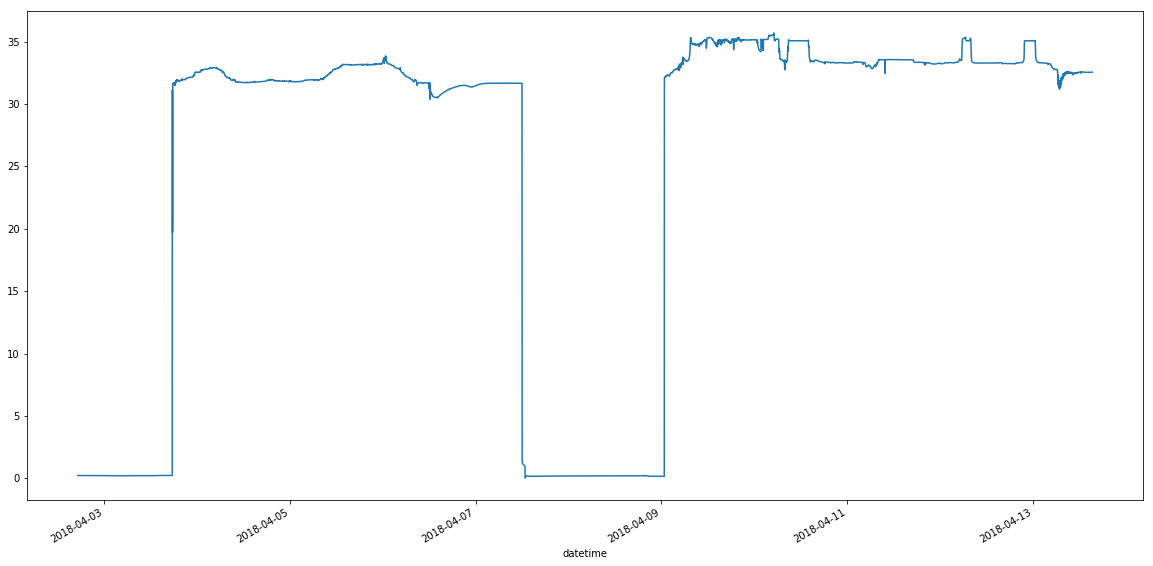

In [20]:
%matplotlib inline

df[SALINITY].plot(figsize=(20,10));

Mask the salinity data, excluding the gaps

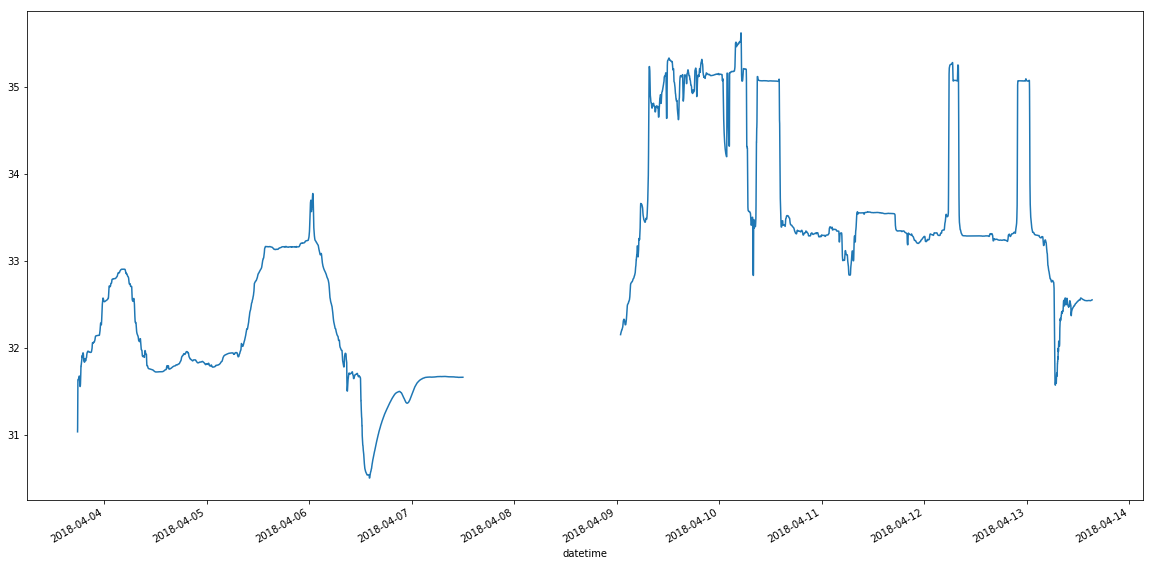

In [14]:
# put nans where salinity was close to zero
salinity = df[SALINITY].mask((df[SALINITY] < 5))
# smooth using a rolling median to remove transients
salinity = salinity.rolling(10).median()
salinity.plot(figsize=(20,10));

Temperature is continuous, even when the ship is in port

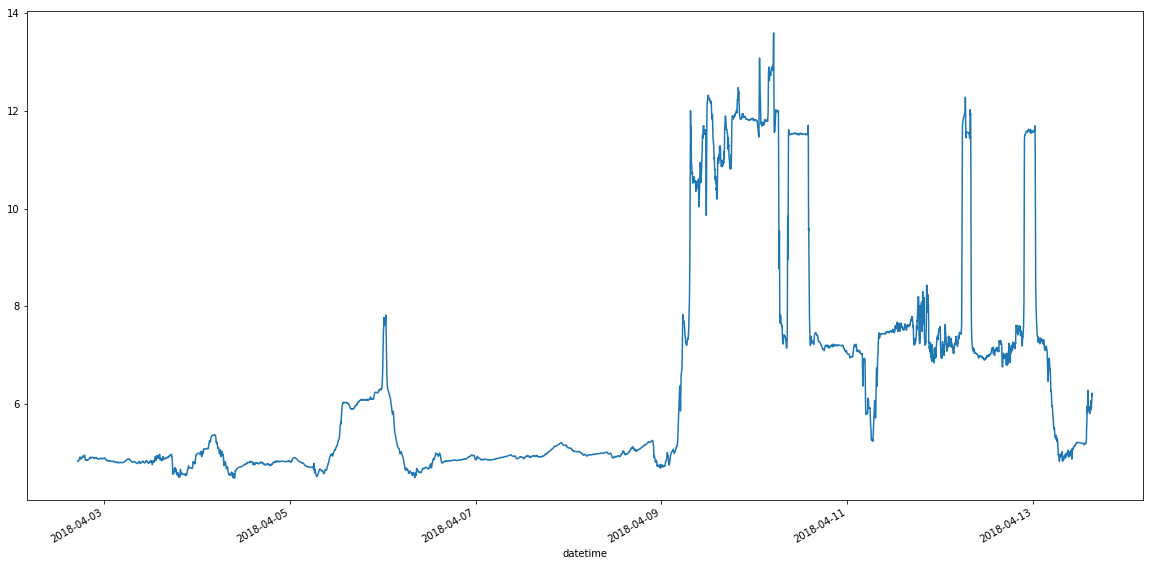

In [21]:
df[TEMPERATURE].plot(figsize=(20,10));

A good indicator of the data gaps is the flow meter on the underway system. When it's shutdown, flow is zero

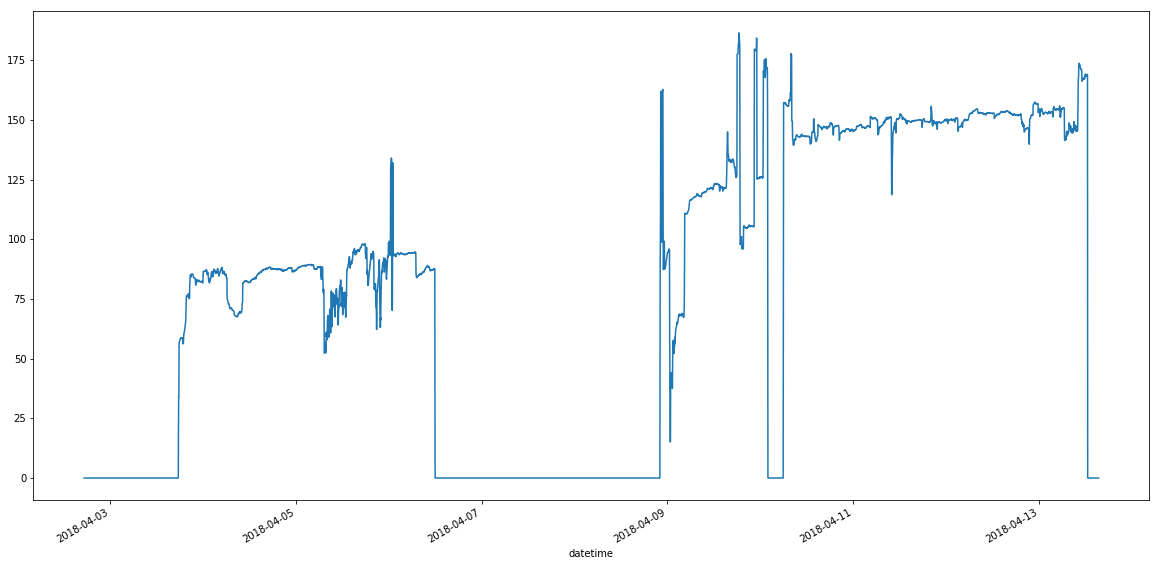

In [22]:
median_flow = df['FLOW'].rolling(10).median()
median_flow.plot(figsize=(20,10));

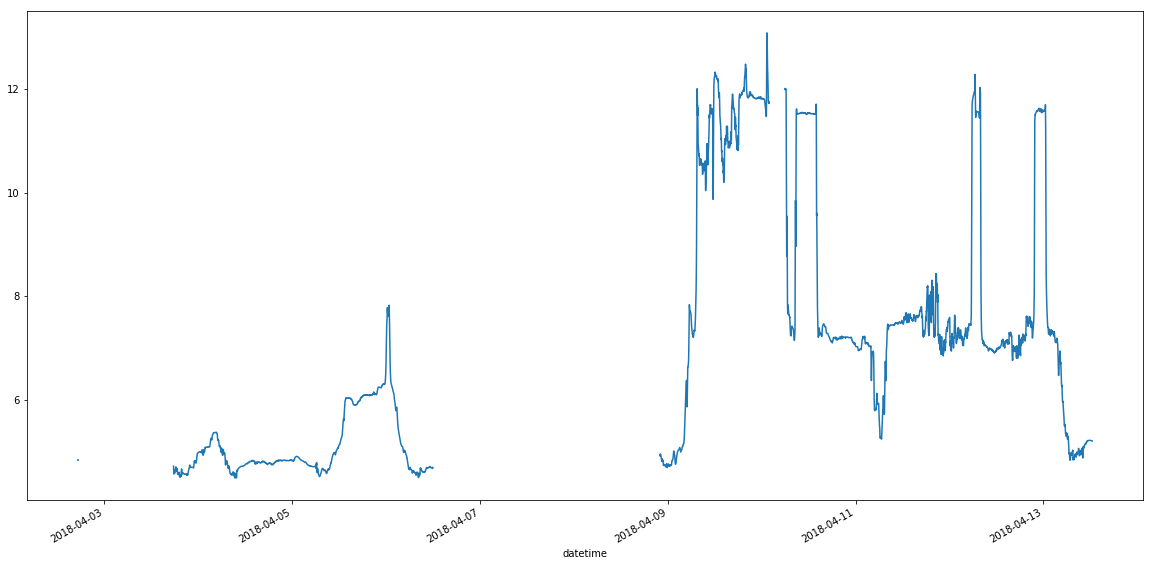

In [18]:
# mask the temperature data based on where the gaps are in the flow
temperature = df[TEMPERATURE].mask(median_flow == 0)
temperature.plot(figsize=(20,10));

In [19]:
# construct a compact dataframe with just the data we care about
LAT_COL = 'lat'
LON_COL = 'lon'

uw = pd.DataFrame({
    'lat': df['Dec_LAT'],
    'lon': df['Dec_LON'],
    'temperature': temperature,
    'salinity': salinity
    })

Map the cleaned data

In [11]:
import cartopy.crs as ccrs

# use the PlateCarree projection
projection = ccrs.PlateCarree()

In [12]:
import matplotlib.pyplot as plt

def make_map(projection=projection, figsize=(8, 8)):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw={'projection': projection},
    )
    return fig, ax

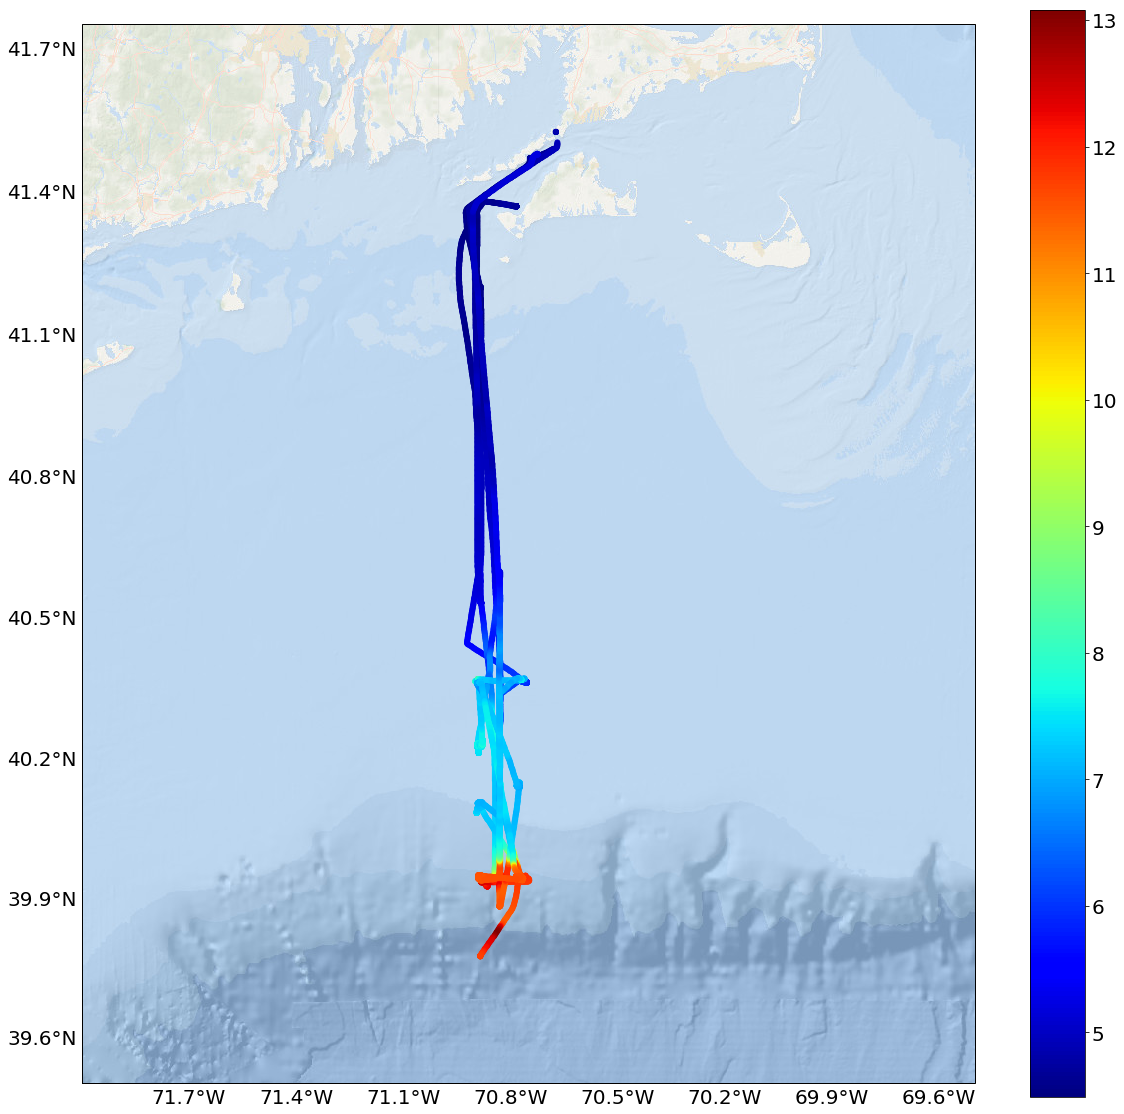

In [18]:
from cartopy.io.img_tiles import GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib

# increase global font size
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

# use the ESRI "World_Ocean_Base" map tile service
tile_url_template = 'https://server.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Base/MapServer/tile/{z}/{y}/{x}'
tiles = GoogleTiles(url=tile_url_template)

# build the map
fig, ax = make_map(projection=tiles.crs, figsize=(20, 20))

# set map extent
# this box roughly captures the LTER area
w, e, s, n = -72, -69.5, 39.5, 41.75
ax.set_extent([w, e, s, n])

# add the tile image at a specific zoom level
zoom = 9 # set to lower values for less detail (faster rendering)
ax.add_image(tiles, zoom)

# plot the underway variable
uw_scatter = plt.scatter(uw[LON_COL], uw[LAT_COL], marker='.', s=100,
            c=uw['temperature'], cmap='jet',
           transform=projection)
plt.colorbar(uw_scatter)

# plot the CTD cast locations
#plt.scatter(cast_md.longitude, cast_md.latitude, marker='^', s=250,
#            c='white', edgecolors='black',
#            transform=projection)

# title the plot after the cruise and variable description
#title = '{} {}'.format(cruise.upper(), var2plot_name)
#plt.title(title, fontsize=30, weight='bold')

# configure tick labels
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = gl.ylabels_right  = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlines = gl.ylines = False